### Importação dos dados



In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import math

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()


,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento


In [3]:
lojas = [loja, loja2, loja3, loja4]
faturamento = 0
fat=[]

for i, df in enumerate(lojas, start=1):
  faturamento_loja =  df['Preço'].sum()
  faturamento += faturamento_loja
  fat.append(faturamento_loja)
  print(f'O faturamento da loja {i}, foi de: {faturamento_loja: ,.2f}')
print(f'Faturamento de todas as lojas: R${faturamento:,.2f}')


O faturamento da loja 1, foi de:  1,534,509.12
O faturamento da loja 2, foi de:  1,488,459.06
O faturamento da loja 3, foi de:  1,464,025.03
O faturamento da loja 4, foi de:  1,384,497.58
Faturamento de todas as lojas: R$5,871,490.79


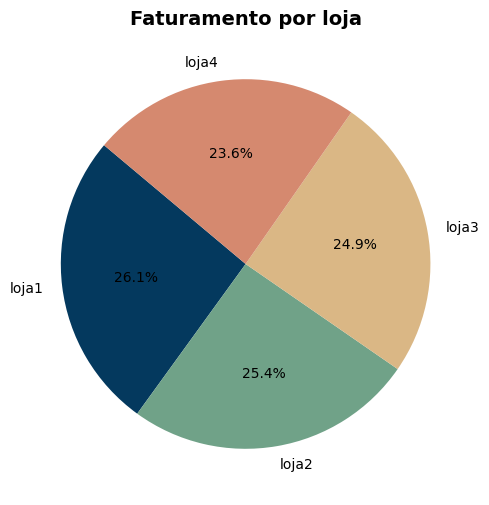

In [29]:
nome_loja = ['loja1', 'loja2', 'loja3', 'loja4']
cores=["#04395E", "#70A288", "#DAB785", "#D5896F"]
plt.figure(figsize=(7,6))
plt.pie(fat, labels=nome_loja, autopct='%1.1f%%', colors=cores, startangle=140)
plt.title('Faturamento por loja', fontsize=14, fontweight='bold')
plt.show()

# 2. Vendas por Categoria


In [71]:
lojas = [loja, loja2, loja3, loja4]
categoria_geral = 0
categoria_grafico=[]

for i, loja in enumerate(lojas, start=1):
    loja_categoria = loja['Categoria do Produto'].value_counts()
    categoria_geral += loja_categoria
    categoria_grafico.append(categoria_geral)
    print(f'Vendas por categoria da loja {i}: \n {loja_categoria}\n \n')



Vendas por categoria da loja 1: 
 Categoria do Produto
moveis                   465
eletronicos              448
brinquedos               324
eletrodomesticos         312
esporte e lazer          284
instrumentos musicais    182
livros                   173
utilidades domesticas    171
Name: count, dtype: int64
 

Vendas por categoria da loja 2: 
 Categoria do Produto
moveis                   442
eletronicos              422
brinquedos               313
eletrodomesticos         305
esporte e lazer          275
instrumentos musicais    224
livros                   197
utilidades domesticas    181
Name: count, dtype: int64
 

Vendas por categoria da loja 3: 
 Categoria do Produto
moveis                   499
eletronicos              451
brinquedos               315
eletrodomesticos         278
esporte e lazer          277
livros                   185
instrumentos musicais    177
utilidades domesticas    177
Name: count, dtype: int64
 

Vendas por categoria da loja 4: 
 Categoria do Produ

In [6]:
print(f'A quantidade de vendas por categoria de todas lojas é como segue: \n {categoria_geral}')

A quantidade de vendas por categoria de todas lojas é como segue: 
 Categoria do Produto
moveis                   1886
eletronicos              1772
brinquedos               1290
eletrodomesticos         1149
esporte e lazer          1113
instrumentos musicais     753
livros                    742
utilidades domesticas     730
Name: count, dtype: int64


# 3. Média de Avaliação das Lojas

In [15]:
def calcula_media(soma, quantidade):
    return soma / quantidade

lojas = [loja, loja2, loja3, loja4]
medias=[]

for i, loja in enumerate(lojas, start=1):
    soma = loja['Avaliação da compra'].sum()
    quantidade = len(loja['Avaliação da compra'])
    media = calcula_media(soma, quantidade)
    medias.append(float(media))
    print(f'Média da avaliação da loja {i}: {media: .2f}')


Média da avaliação da loja 1:  4.00
Média da avaliação da loja 2:  4.04
Média da avaliação da loja 3:  4.05
Média da avaliação da loja 4:  4.00


<function matplotlib.pyplot.show(close=None, block=None)>

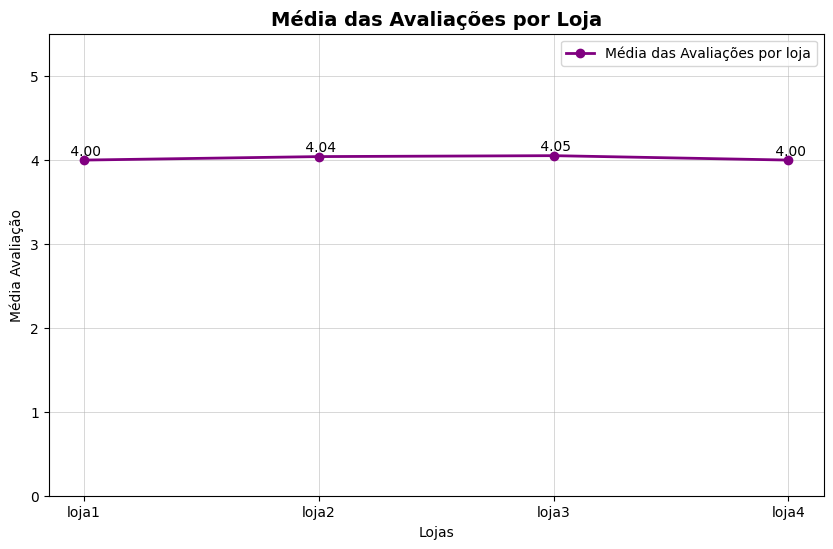

In [25]:
nome_loja = ['loja1', 'loja2', 'loja3', 'loja4']
cor = ["#BE39D5", "#76DBBB", "#4DC139", "#606B0A"]


plt.figure(figsize=(10,6))
plt.plot(nome_loja, medias, marker= 'o', color='purple', linewidth=2, label='Média das Avaliações por loja')
for i, valor in enumerate(medias):
  plt.text(i, valor+0.06, f'{valor: .2f}', ha = 'center', fontsize=10)
plt.title('Média das Avaliações por Loja', fontsize=14, fontweight='bold')
plt.xlabel('Lojas')
plt.ylabel('Média Avaliação')
plt.ylim(0, 5.5)
plt.grid(True, linewidth=0.5, alpha=0.7)
plt.legend()
plt.show



# 4. Produtos Mais e Menos Vendidos

In [9]:
lojas = [loja, loja2, loja3, loja4]
geral_mais = 0
geral_menos = 0
for i, loja in enumerate(lojas, start=1):
    contagem = loja['Produto'].value_counts()
    mais_vendidos = contagem.sort_values(ascending=False)
    menos_vendidos= contagem.sort_values(ascending=True)
    geral_menos += menos_vendidos
    geral_mais += mais_vendidos
    print(f'Produtos menos vendidos:\n loja {i} \n {menos_vendidos.head()}')
    print('********************')

    print(f'Podutos mais vendidos: \n loja {i} \n {mais_vendidos.head()}')
    print('********************')


Produtos menos vendidos:
 loja 1 
 Produto
Guitarra                       33
Guarda roupas                  34
Violão                         37
Ciência de dados com python    38
Lavadora de roupas             38
Name: count, dtype: int64
********************
Podutos mais vendidos: 
 loja 1 
 Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64
********************
Produtos menos vendidos:
 loja 2 
 Produto
Jogo de tabuleiro    32
Mesa de jantar       34
Impressora           34
Poltrona             35
Fone de ouvido       37
Name: count, dtype: int64
********************
Podutos mais vendidos: 
 loja 2 
 Produto
Iniciando em programação    65
Micro-ondas                 62
Bateria                     61
Violão                      58
Pandeiro                    58
Name: count, dtype: int64
********************
Produtos menos vendidos:
 loja 3 
 Produto

In [10]:
print(f'A quantidade de produtos menos vendidos de todas lojas é como segue: \n {menos_vendidos.head()}')
print('********************')

print(f'A quantidade de produtos mais vendidos de todas lojas é como segue: \n {mais_vendidos.head()}')
print('********************')

A quantidade de produtos menos vendidos de todas lojas é como segue: 
 Produto
Guitarra                       33
Guarda roupas                  34
Violão                         37
Ciência de dados com python    38
Lavadora de roupas             38
Name: count, dtype: int64
********************
A quantidade de produtos mais vendidos de todas lojas é como segue: 
 Produto
Cama box                    62
Faqueiro                    59
Dashboards com Power BI     56
Cama king                   56
Carrinho controle remoto    55
Name: count, dtype: int64
********************


# 5. Frete Médio por Loja


In [68]:
lojas = [loja, loja2, loja3, loja4]
frete_medio_graf= []

for i, df in enumerate(lojas, start=1):

    soma_frete = df['Frete'].sum()
    total_pedidos = df['Frete'].count()
    frete_medio = soma_frete / total_pedidos
    frete_medio_graf.append(frete_medio)
    print(f" Frete médio da Loja {i}: R$ {frete_medio:.2f}")

 Frete médio da Loja 1: R$ 34.69
 Frete médio da Loja 2: R$ 33.62
 Frete médio da Loja 3: R$ 33.07
 Frete médio da Loja 4: R$ 31.28


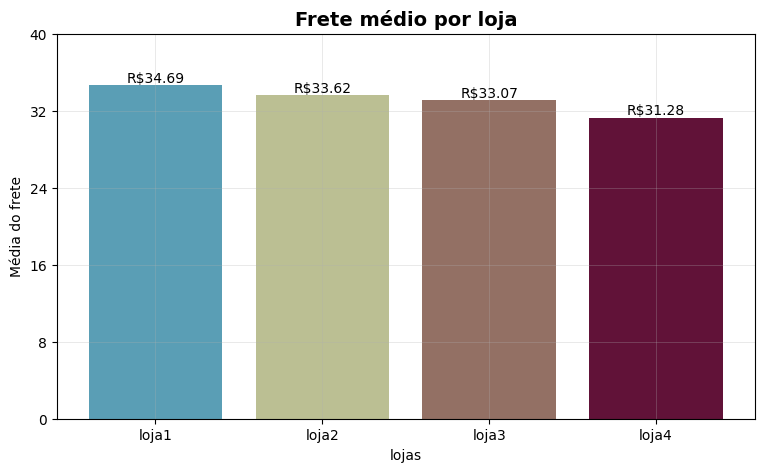

In [69]:
nome_loja = ['loja1', 'loja2', 'loja3', 'loja4']
barras = ["#5A9EB5", "#BBBF93", "#937064", "#611238"]

plt.figure(figsize=(9,5))
plt.bar(nome_loja, frete_medio_graf, color=barras)
for i, valor in enumerate(frete_medio_graf):
    plt.text(i, valor + 0.3, f'R${valor:.2f}', ha='center', fontsize=10)
plt.yticks(range(0, int(max(frete_medio_graf)) +9, 8))
plt.xlabel('lojas')
plt.ylabel('Média do frete')
plt.title('Frete médio por loja', fontweight='bold', fontsize= 14)
plt.grid(True, linewidth=0.5, alpha=0.4)
plt.show()